# What Makes A Song Popular - Caden Luu (8/1/25)

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Introduction

This project explores Spotify's song features to understand what makes a song popular. By analyzing a variety of audio characteristics and metadata, we aim to build models and identify patterns that help predict whether a song is likely to be a hit.

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing dataset

In [3]:
df = pd.read_csv('SpotifyDataSet/SpotifyFeatures.csv')

In [4]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
df.shape

(232725, 18)

## The Data

**Feature / Independent Variables**
 * acousticness - Level of acoustic (0-1) Higher = more acoustic
 * danceability - how suitable a track is for dancing (0-1) Higher = more danceable
 * energy - Intensity and activity (0-1)
 * loudness - overall loudness in decibels (typically negative values)
 * speechiness - amount of spoken words
 * instrumentalness - how likely the track is instrumental (0-1)
 * liveness - probablity the track was recorded live (e.g. has audience noise)
 * valence - positivity/happiness of the track (0-1)
 * tempo - beats per minute
 * duration_ms - length of the track in milliseconds
 * key - the musical key
 * mode - Major (1) or minor(0)
 * time_signature - Estimated beats per bar

**Target / Dependent Variable**
 * Hit - Whether the song is a hit (1) or not a hit (0)

## Defining target variable

In [6]:
df['is_hit'] = df['popularity'].apply(lambda x: 1 if x >= 60 else 0)

## Data Cleaning

In [7]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
is_hit              0
dtype: int64

In [8]:
missing_track = df[df['track_name'].isna()]
print(missing_track)

        genre        artist_name track_name                track_id  \
208285  World  Elevation Worship        NaN  7BGQCe62A58Q5ZgpQFX93t   

        popularity  acousticness  danceability  duration_ms  energy  \
208285          44         0.019         0.287       350027   0.446   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
208285               0.0   F       0.1    -7.214  Major       0.0317  138.727   

       time_signature  valence  is_hit  
208285            4/4   0.0387       0  


### Filling in the missing track

In [9]:
df['track_name'] = df['track_name'].fillna("Unknown Track")
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
is_hit              0
dtype: int64

### Dealing with duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
print(f"Before: {len(df)} rows")
df = df.drop_duplicates()
print(f"After: {len(df)} rows")

Before: 232725 rows
After: 232725 rows


## Exploratory Data Analysis 

### Countplot of Target Variable

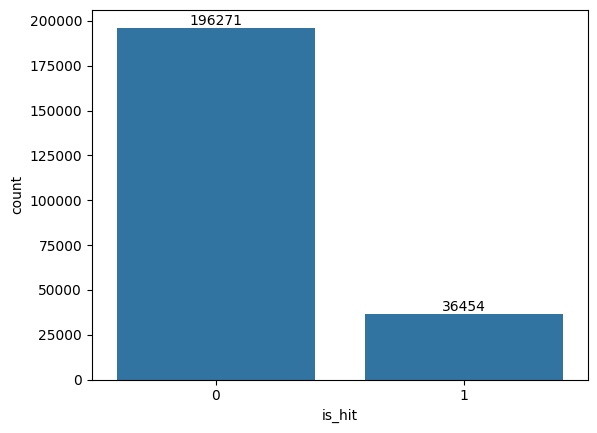

In [12]:
ax = sns.countplot(x = 'is_hit', data = df)
for container in ax.containers:
    ax.bar_label(container)

### Histograms of some independent variable using subplots

<Axes: xlabel='acousticness', ylabel='Count'>

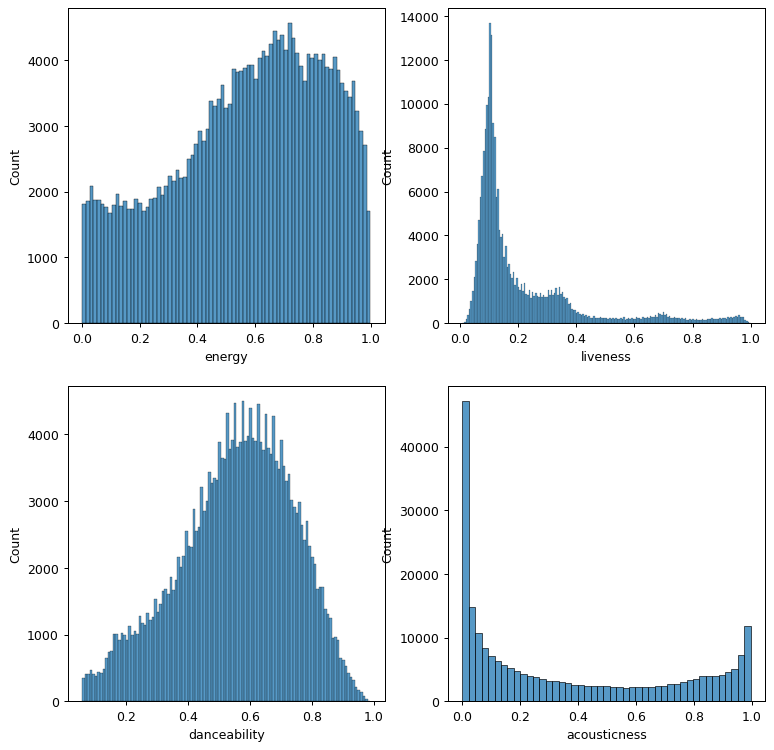

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), dpi = 90)
sns.histplot(ax=axes[0][0], x = 'energy', data = df)
sns.histplot(ax=axes[0][1], x = 'liveness', data = df)
sns.histplot(ax=axes[1][0], x = 'danceability', data = df)
sns.histplot(ax = axes[1][1], x = 'acousticness', data = df)

### Heatmap For Correlations

#### Getting numeric features

In [14]:
numeric_df = df.select_dtypes(include = 'number')

<Axes: >

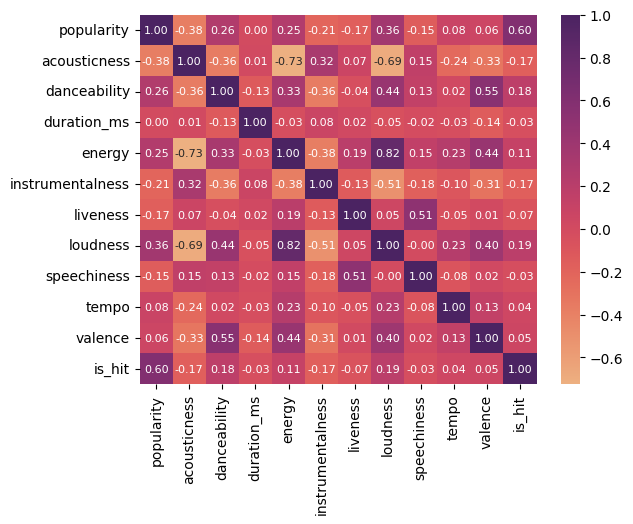

In [15]:
sns.heatmap(numeric_df.corr(), 
            annot = True, 
            annot_kws = {'fontsize': 8}, 
            cmap = 'flare', 
            fmt = '.2f'
)

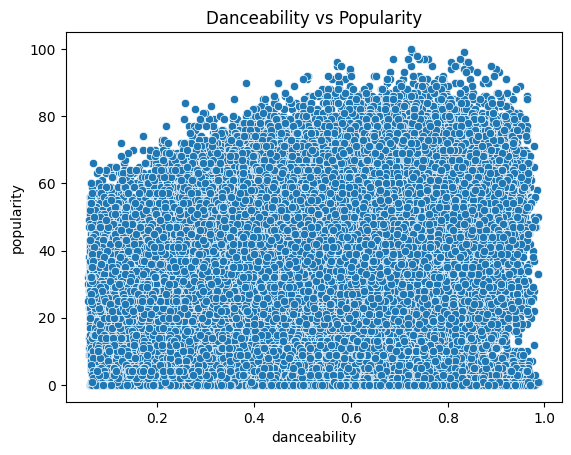

In [16]:
sns.scatterplot(x = 'danceability', y = 'popularity', data = df)
plt.title("Danceability vs Popularity")
plt.show()

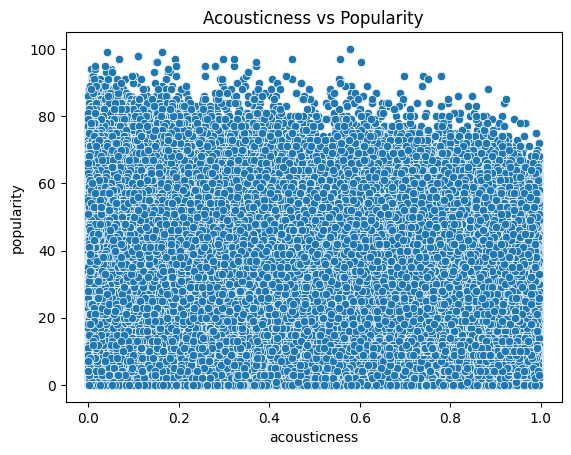

In [17]:
sns.scatterplot(x = 'acousticness', y = 'popularity', data = df)
plt.title("Acousticness vs Popularity")
plt.show()

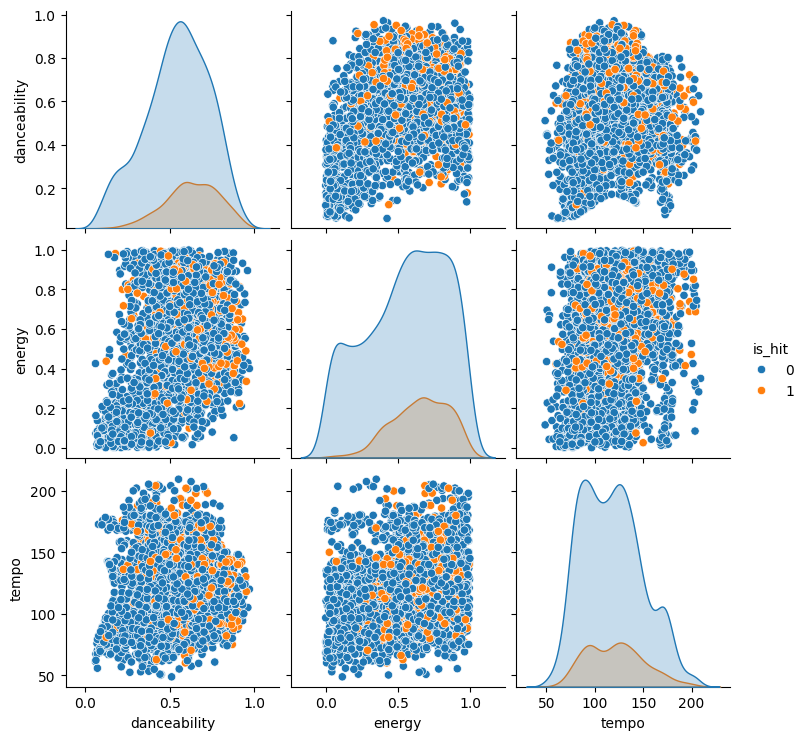

In [18]:
sns.pairplot(df.sample(3000), vars = ['danceability', 'energy', 'tempo', ], hue = 'is_hit')

#### Explaining what graphs tell us

 * Data is skewed (not_hit = majority, is_hit = minority)
 * Liveness histogram is skewed left - meaning that songs tend to be less lively
 * danceability, energy, loudness, tempo, and valence all have positive correlations with the target variable **is_hit**, although weak to moderate correlations
 * Hits tend to have higher danceability and energy

## Getting independent and dependent variable

In [19]:
features = ['danceability', 'energy', 'loudness', 'instrumentalness', 'tempo']
X = df[features]
y = df.is_hit

## Splitting into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size = 0.2, random_state = 0)

### Dealing with Imbalanced Dataset

In [21]:
# Resampling Data with Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'not majority',random_state = 0)
X_train_res, y_train_res = ros.fit_resample(X_train,y_train)


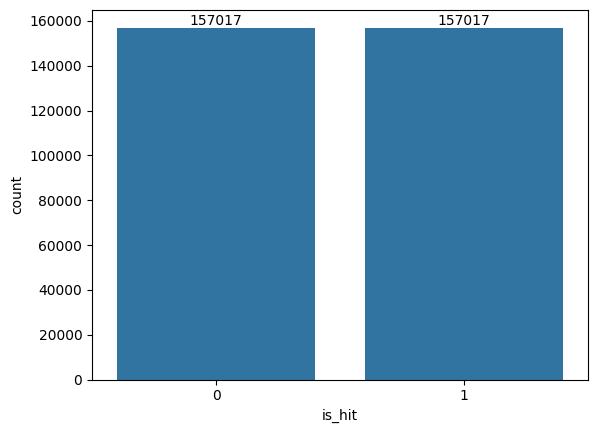

In [22]:
ax = sns.countplot(x = y_train_res, data = df)
for container in ax.containers:
    ax.bar_label(container)

### Feature Scale

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fs_X_train_res = X_train_res.copy()
fs_X_test_res = X_test.copy()

fs_X_train_res = scaler.fit_transform(fs_X_train_res)
fs_X_test = scaler.transform(X_test)

## Making models

### Random Forest Classification

In [24]:
n_estimators = [50,100,150,200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10,20,30,None]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

In [25]:
param_grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap
}

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# Finding best parametersr using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rfc, 
                                   param_distributions = param_grid,
                                   cv = 5, 
                                   verbose = 2, 
                                   n_iter = 10, 
                                   n_jobs = 4
)

In [27]:
rf_RandomGrid.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=2)

In [28]:
print("Best params: ", rf_RandomGrid.best_params_)
print("Best CV score: ", rf_RandomGrid.best_score_)
best_rfc_params = rf_RandomGrid.best_params_

Best params:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best CV score:  0.9926632149021003


### Rebuild model with "best" parameters

In [29]:
final_rfc_model = RandomForestClassifier(**best_rfc_params)
# Don't need to train Random Forest Classification on scaled data
final_rfc_model.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=False, n_estimators=200)

In [30]:
# Prediction
final_rfc_pred = final_rfc_model.predict(X_test)

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1,10,100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100,200,500]
}
lr_randomsearch = RandomizedSearchCV(
    estimator = lr,
    param_distributions = param_grid,
    n_iter = 10,
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = 4
)
lr_randomsearch.fit(fs_X_train_res, y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear']},
                   random_state=42, verbose=2)

In [32]:
print("Best Parameters: ", lr_randomsearch.best_params_)
print("Best CV Score: ", lr_randomsearch.best_score_)
best_lr_params = lr_randomsearch.best_params_

Best Parameters:  {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'C': 100}
Best CV Score:  0.6563142777238596


In [33]:
# Rebuilding model
final_lr_model = LogisticRegression(**best_lr_params)
final_lr_model.fit(fs_X_train_res,y_train_res)

LogisticRegression(C=100, max_iter=500)

In [34]:
# Predictions
final_lr_pred = final_lr_model.predict(fs_X_test)

### XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
param_grid = {
    'n_estimators': [50,100,150,200],
    'max_depth': [3,5,7,10],
    'learning_rate': [0.01,0.1,1,10,100],
    'subsample':[0.6,0.8,1.0],
    'colsample_bytree': [0.6,0.8,1.0],
    'colsample_bylevel': [0,6,0.8,1.0],
    'colsample_bynode': [0.6,0.8,1.0],
    'gamma': [0,1,5,10],
    'reg_alpha': [0.0,1.0,5.0,10.0],
    'reg_lambda': [0.0,1.0,5.0,10.0]   
}

In [36]:
xgb_randomsearch = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_grid,
    n_iter = 10,
    cv = 5,
    verbose = 2,
    n_jobs = 4
)
xgb_randomsearch.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           num_parallel_tree=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bylevel': [0, 6, 0.8, 1.0],
                                        'colsample_bynode': [0.6, 0.8, 1.0],
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5, 10],
                                        'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 150, 200],
                                        'reg_alpha': [0.0, 1.0, 5.0, 10.0],
                                        'reg_lambda': [0.0, 1.0, 5.0, 10.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=2)

In [37]:
print("Best parameters :", xgb_randomsearch.best_params_)
print("Best CV score: ", xgb_randomsearch.best_score_)
best_xgb_params = xgb_randomsearch.best_params_

Best parameters : {'subsample': 0.8, 'reg_lambda': 5.0, 'reg_alpha': 10.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bynode': 0.6, 'colsample_bylevel': 1.0}
Best CV score:  0.760115139984097


In [38]:
# Using best parameters for XGBoost model
neg, pos = np.bincount(y_train_res)
scale = neg/pos
final_xgb_model = XGBClassifier(**best_xgb_params,use_label_encoder = False, eval_metric = 'logloss',scale_pos_weight = scale)
final_xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=0.6, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [39]:
# Predictions
final_xgb_pred = final_xgb_model.predict(X_test)

## Testing model

### Accuracy Score

In [40]:
from sklearn.metrics import accuracy_score

model_predictions = {
    'Random Forest Classification': final_rfc_pred,
    'Logistic Regression': final_lr_pred,
    'XGBClassifier': final_xgb_pred
}
for model_name, predictions in model_predictions.items():
    acc_score = accuracy_score(y_test,predictions)
    print(f"{model_name} Accuracy Score: {acc_score: .4f}")


Random Forest Classification Accuracy Score:  0.9578
Logistic Regression Accuracy Score:  0.5693
XGBClassifier Accuracy Score:  0.6792


### Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
model_predictions = {
    'Random Forest Classification': final_rfc_pred,
    'Logistic Regression': final_lr_pred,
    'XGBClassifier': final_xgb_pred
}
for model_name, predictions in model_predictions.items():
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix: \n{cm}\n")

Random Forest Classification Confusion Matrix: 
[[38821   433]
 [ 1531  5760]]

Logistic Regression Confusion Matrix: 
[[20807 18447]
 [ 1602  5689]]

XGBClassifier Confusion Matrix: 
[[25733 13521]
 [ 1410  5881]]



### Matthews Correlation Coefficient (MCC)

In [42]:
# Use when imbalanced dataset
from sklearn.metrics import matthews_corrcoef
model_predictions = {
    'Random Forest Classification': final_rfc_pred,
    'Logistic Regression': final_lr_pred,
    'XGBClassifier': final_xgb_pred
}
for model_name, predictions in model_predictions.items():
    mcc = matthews_corrcoef(y_test, predictions)
    print(f"{model_name} MCC: {mcc: .4f}")

Random Forest Classification MCC:  0.8336
Logistic Regression MCC:  0.2257
XGBClassifier MCC:  0.3407


In [43]:
from sklearn.metrics import recall_score, precision_score
model_predictions = {
    'Random Forest Classification': final_rfc_pred,
    'Logistic Regression': final_lr_pred,
    'XGBClassifier': final_xgb_pred
}
for model_name, predictions in model_predictions.items():
    precision = precision_score(y_test, predictions, pos_label = 1)
    recall = recall_score(y_test, predictions, pos_label = 1)
    print(f"{model_name} Precision Score: {precision: .3f}")
    print(f"{model_name} Recall Score: {recall: .3f}")

Random Forest Classification Precision Score:  0.930
Random Forest Classification Recall Score:  0.790
Logistic Regression Precision Score:  0.236
Logistic Regression Recall Score:  0.780
XGBClassifier Precision Score:  0.303
XGBClassifier Recall Score:  0.807


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_rfc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     39254
           1       0.93      0.79      0.85      7291

    accuracy                           0.96     46545
   macro avg       0.95      0.89      0.91     46545
weighted avg       0.96      0.96      0.96     46545



<Axes: >

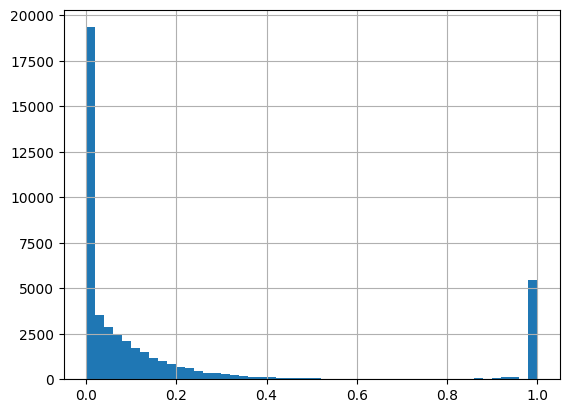

In [45]:
probs = final_rfc_model.predict_proba(X_test)[:,1]
pd.Series(probs).hist(bins=50)

In [46]:
import numpy as np
probs = final_rfc_model.predict_proba(X_test)[:,1]
print("mean prob for positives: ", probs[y_test==1].mean())
print("mean prob for negatives: ", probs[y_test==0].mean())

mean prob for positives:  0.811733872607498
mean prob for negatives:  0.07006807253437737


In [47]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
print("ROC AUC:", roc_auc_score(y_test, probs))
prec, recall, th = precision_recall_curve(y_test, probs)
print("PR AUC:", auc(recall, prec))

ROC AUC: 0.9448392432457431
PR AUC: 0.8761219011337897


## Simulating a Prediction

In [48]:
example_song = pd.DataFrame([{
    'danceability': 0.85,
    'energy': 0.95,
    'loudness': -4.0,
    'instrumentalness': 0,
    'tempo': 70
    
}])
final_rfc_model.predict_proba(example_song)

array([[1., 0.]])

In [49]:
example_song2 = pd.DataFrame([{
    'danceability': 0.85,
    'energy': 0.95,
    'loudness': -4.0,
    'instrumentalness': 9.11e-06,
    'tempo': 80
    
}])
final_rfc_model.predict_proba(example_song2)

array([[0.97, 0.03]])

## Evaluation

 * Regarding both *accuracy score* and *Matthews Correlation Coefficient*, Random Forest Classification proves to be the best model with a *0.95 accuracy score* and *0.82 Matthews Correlation Coefficient*
 * Classification report tells us that *87% of predicted hits were actually hits* and *80% of real hits were correctly identified*


**Reasons Why Other Models Not Be Peforming As Well**
 * Logistic Regression performs better on linear relationship between features and target
 * XGBoost may be underfitting or not hypertuned enough
 * Logistic Regression and XGBoost are unable to capture patterns in non-linear patterns in data.

## Challenges

 * Getting good 'metrics' but model still not predicting an obvious *hit* as a *hit* - Potential solutions: lowering threshold, training on different features ------ **Solution**: Replacing *valence* with *instrumentalness*
 * In Streamlit, showing probabilities between 0.01 and 0.15, nothing above
   
 * Dealing with imbalanced data - using oversampling to fix it
 * Replaced *tempo* with *acousticness*, still couldn't predict obvious hits
 * Predicting songs with low *danceability* and *energy* as hits, when should not be hits



## New Things Learned

 * Deplying app through Streamlit
 * Hypertuning models (Random Search CV)
 * Dealing with imbalanced data
 * XGBoost Classifer model

In [50]:
import joblib
joblib.dump(final_rfc_model, 'song_hit_model.pkl')

['song_hit_model.pkl']